## 토이프로젝트 #1 - 치킨 시각화 해버렷!

## Day_01 : 데이터와 처음 만나버렷!
**목표 : 데이터를 이해하고 기본적인 전처리를 수행한다.& 이후 쪼개진 데이터 처리 자동화 함수를 만든다**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# matplotlib 에서 한글을 쓰기 위해 폰트를 수정하는 코드
# 로컬에 설치된 폰드만 사용가능 matplotlib에 연결된 로컬폰트를 확인하고 싶다면
#for i, x in enumerate(matplotlib.font_manager.fontManager.ttflist):
#    print(i,x)

matplotlib.rc('font', family='NanumBarunpen')

# ipython notebook상에 바로 플롯을 출력하도록 하는 매직명령어
%matplotlib inline

In [2]:
#for i, x in enumerate(matplotlib.font_manager.fontManager.ttflist):
#    print(i,x)

In [3]:
# 데이터로딩 
data = pd.read_csv('../sk_chickin_call_201704.csv', encoding='utf-8')
data.head(10)

,"﻿""기준일""",요일,성별,연령대,시도,시군구,읍면동,업종,통화건수
0,20170401,토,여,40대,서울특별시,강남구,대치동,치킨,17
1,20170401,토,남,50대,서울특별시,강남구,논현동,치킨,15
2,20170401,토,여,50대,서울특별시,강남구,삼성동,치킨,37
3,20170401,토,여,60대이상,서울특별시,강남구,삼성동,치킨,11
4,20170401,토,여,60대이상,서울특별시,강남구,신사동,치킨,5
5,20170401,토,남,60대이상,서울특별시,강남구,논현동,치킨,5
6,20170401,토,남,30대,서울특별시,강남구,대치동,치킨,5
7,20170401,토,여,10대,서울특별시,강남구,역삼동,치킨,5
8,20170401,토,여,10대,서울특별시,강남구,도곡동,치킨,5
9,20170401,토,여,20대,서울특별시,강남구,삼성동,치킨,37


In [4]:
# 한글 변수명은 처리하기 귀찮은 점이 많아서 영어로 변수명을 수정
data.columns = ['Date', 'Day_of_week', 'Gender', 'Age', 'Loc_big', 'Loc_mid', 'Loc_small', 'Cate', 'Call']
data.head(10)

,Date,Day_of_week,Gender,Age,Loc_big,Loc_mid,Loc_small,Cate,Call
0,20170401,토,여,40대,서울특별시,강남구,대치동,치킨,17
1,20170401,토,남,50대,서울특별시,강남구,논현동,치킨,15
2,20170401,토,여,50대,서울특별시,강남구,삼성동,치킨,37
3,20170401,토,여,60대이상,서울특별시,강남구,삼성동,치킨,11
4,20170401,토,여,60대이상,서울특별시,강남구,신사동,치킨,5
5,20170401,토,남,60대이상,서울특별시,강남구,논현동,치킨,5
6,20170401,토,남,30대,서울특별시,강남구,대치동,치킨,5
7,20170401,토,여,10대,서울특별시,강남구,역삼동,치킨,5
8,20170401,토,여,10대,서울특별시,강남구,도곡동,치킨,5
9,20170401,토,여,20대,서울특별시,강남구,삼성동,치킨,37


## 데이터 확인 
### 데이터 확인 5가지 프로세스

1. Checking N
2. Checking Head&Tail(위에서 미리 했음)
3. Checking Structure 
4. Checking Summary
5. Checking NaN

### 1.Checking N

In [5]:
data.shape

(39307, 9)

**코드실행 후 생각: 데이터가 생각보다 많다. 13년도 부터 모은다면 꾀 양이 많아질것 같다. 이후 전처리 함수를 만들때 연산비용을 염두하면서 코딩하자**

### 3. Checking Structure

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39307 entries, 0 to 39306
Data columns (total 9 columns):
Date           39307 non-null int64
Day_of_week    39307 non-null object
Gender         39307 non-null object
Age            39307 non-null object
Loc_big        39307 non-null object
Loc_mid        39307 non-null object
Loc_small      39307 non-null object
Cate           39307 non-null object
Call           39307 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.7+ MB


### 4. Checking summary

In [7]:
data.describe(include='all')

,Date,Day_of_week,Gender,Age,Loc_big,Loc_mid,Loc_small,Cate,Call
count,3.930700e+04,39307,39307,39307,39307,39307,39307,39307,39307.000000
unique,NaN,7,2,6,1,25,222,1,NaN
top,NaN,토,여,30대,서울특별시,강남구,신사동,치킨,NaN
freq,NaN,7071,20097,8384,39307,3008,369,39307,NaN
mean,2.017042e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.515913
std,8.699773e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.427682
min,2.017040e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,2.017041e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,2.017042e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,2.017042e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


**코드실행 후 생각: 범주가 하나밖에 없는 변수를 지워야 겠다. 또 Loc_small같은 경우 범주가 222개로 너무 많기 때문에 처리에 대해 좀 더 생각할 필요가 있겠다.마지막으로 Call변수의 경우 왜도가 어마무시하기 때문에 생각해 봐야겠다.**

### 5. Checking NaN

In [8]:
data.isnull().sum()

Date           0
Day_of_week    0
Gender         0
Age            0
Loc_big        0
Loc_mid        0
Loc_small      0
Cate           0
Call           0
dtype: int64

## 데이터 전처리 #1
### 목표 : 
1. **데이터를 살펴본 후 나온 결론을 토대로 데이터 전처리 **
    * Loc_big과 Cate 변수는 1가지 범주밖에 없기 때문에 삭제한다.

### (1) Loc_big & Cate Variables 삭제

In [9]:
data.drop(['Loc_big', 'Cate'], axis=1, inplace=True)

## EDA #1
### 목표 : 
1. **데이터의 이해와 가설 획득**
    * 단일 변수

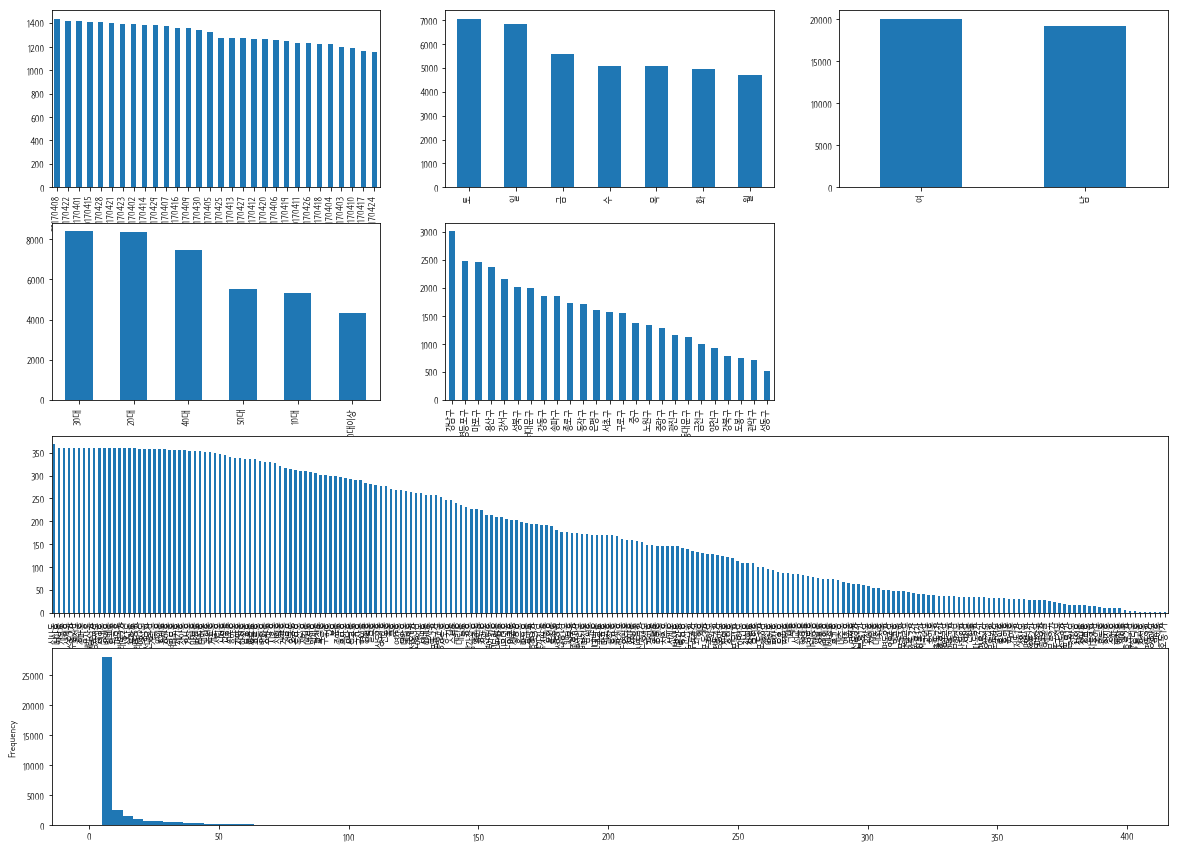

In [10]:
fig = plt.figure(figsize=[20,15])
col = 0
for i in range(1,6):
    fig.add_subplot(4,3,i)
    data.iloc[:,col].value_counts(sort=True).plot(kind='bar')
    col +=1
fig.add_subplot(4,3,(7,9))
data['Loc_small'].value_counts(sort=True).plot(kind='bar')
fig.add_subplot(4,3,(10,12))
data['Call'].plot(kind='hist', bins = 100)

plt.show()

## EDA #1 결과

변수이해 : 
* Call 변수는 왜도가 굉장히 높으며 자세히 볼 필요가 있다.
* Call 수는 최소 5이며(홈페이지 참조) 대부분이 5 근처에 있다.
* 한 행이 한 사람을 뜻하는건지 아니면 한 행이 해당 변수의 특성에 맞는 사람들을 sum up된 데이터인지 정확히 구분할 필요성이 있다. 왜냐하면 한 행이 한 사람을 뜻할 경우 한사람이 하루에 400통 가까운 전화를 치킨집에 할 정상적인 이유가 없기 때문이다.
* 추후 매쉬업된 데이터를 살펴볼때 Date변수로 관리하는 것 보다 년/월/일로 구분된 데이터를 다루는게 편하기 때문에 년월일로 나누자

## 데이터 전처리 #2

* 추후 데이터 매쉬업을 위해 Date 변수를 년/월/일로 쪼갠다

In [17]:
data['Year'] = data.Date.apply(lambda x : str(x)[0:4])
data['Month'] = data.Date.apply(lambda x : str(x)[4:6])
data['Day'] = data.Date.apply(lambda x : str(x)[6:8])

data.drop('Date', axis=1, inplace=True)

# EDA #2

* Call 변수를 좀 더 살펴보자

### Call 변수 자세하게 살펴보기 숲에서 나무로

In [18]:
data.Call.describe()

count    39307.000000
mean        13.515913
std         22.427682
min          5.000000
25%          5.000000
50%          5.000000
75%         10.000000
max        396.000000
Name: Call, dtype: float64

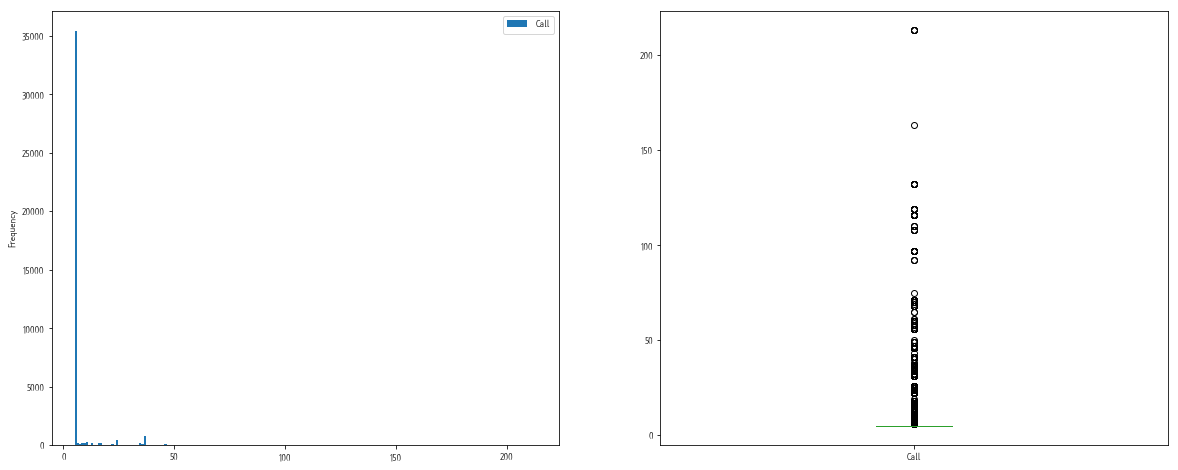

In [19]:
fig = plt.figure(figsize=[20,8])
ax1 = fig.add_subplot(1,2,1)
data.loc[data.Call].plot(kind='hist', bins = 200, ax = ax1)

ax2 = fig.add_subplot(1,2,2)
data.loc[data.Call].plot(kind='box', ax = ax2)
plt.show()

**5 부터 10까지의 값이 전체의 약 75%를 차지하고 있는것을 볼 수 있으며, 나머지 10%의 값 때문에 왜도가 굉장히 큰 것을 발견 할 수 있다. **
**따라서 좀 더 미시적으로 바라볼 필요가 있다고 판단했다.**

In [20]:
# 왜도를 크게 만드는 75% 이후의 call 값을 살펴보자
print(data.loc[data.Call > 10].shape)
data.loc[data.Call > 10].head()

(9738, 9)


,Day_of_week,Gender,Age,Loc_mid,Loc_small,Call,Year,Month,Day
0,토,여,40대,강남구,대치동,17,2017,04,01
1,토,남,50대,강남구,논현동,15,2017,04,01
2,토,여,50대,강남구,삼성동,37,2017,04,01
3,토,여,60대이상,강남구,삼성동,11,2017,04,01
9,토,여,20대,강남구,삼성동,37,2017,04,01


In [21]:
data.Call.loc[data.Call > 10].describe()

count    9738.000000
mean       38.040563
std        35.028000
min        11.000000
25%        16.000000
50%        26.000000
75%        46.000000
max       396.000000
Name: Call, dtype: float64

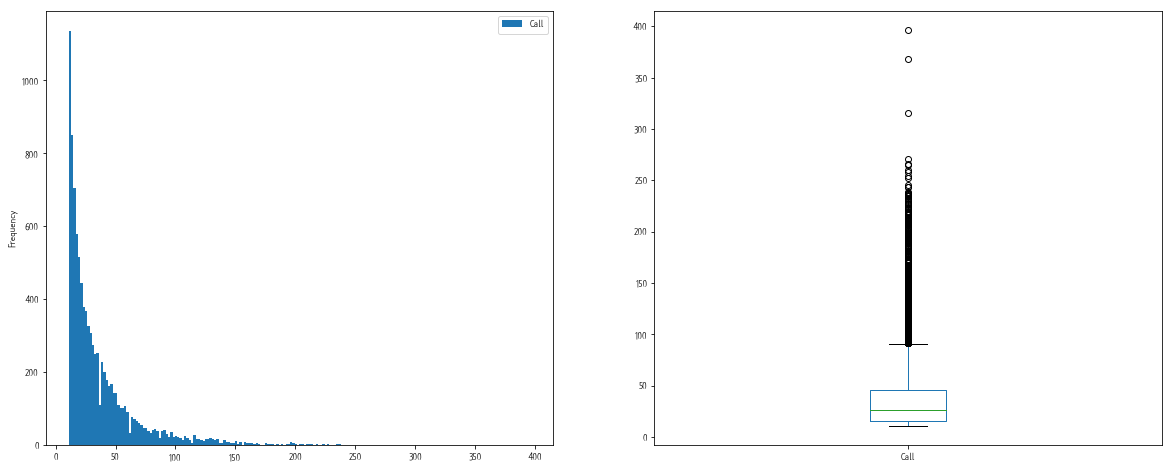

In [22]:
fig = plt.figure(figsize=[20,8])
ax1 = fig.add_subplot(1,2,1)
data.loc[data.Call > 10].plot(kind='hist', bins = 200, ax = ax1)

ax2 = fig.add_subplot(1,2,2)
data.loc[data.Call > 10].plot(kind='box', ax = ax2)
plt.show()

**11부터 396(max)까지의 분포는 위와 같다. 16이하의 값이 전체의 1/4를 차지하고 있고 왜도가 높은 분포는 달라지지 않는다.**

In [23]:
# 전체 자료의 75%는 10이하이기 때문에 살펴본다.

print(data.loc[data.Call <= 10].shape)
data.loc[data.Call <= 10].head()

(29569, 9)


,Day_of_week,Gender,Age,Loc_mid,Loc_small,Call,Year,Month,Day
4,토,여,60대이상,강남구,신사동,5,2017,04,01
5,토,남,60대이상,강남구,논현동,5,2017,04,01
6,토,남,30대,강남구,대치동,5,2017,04,01
7,토,여,10대,강남구,역삼동,5,2017,04,01
8,토,여,10대,강남구,도곡동,5,2017,04,01


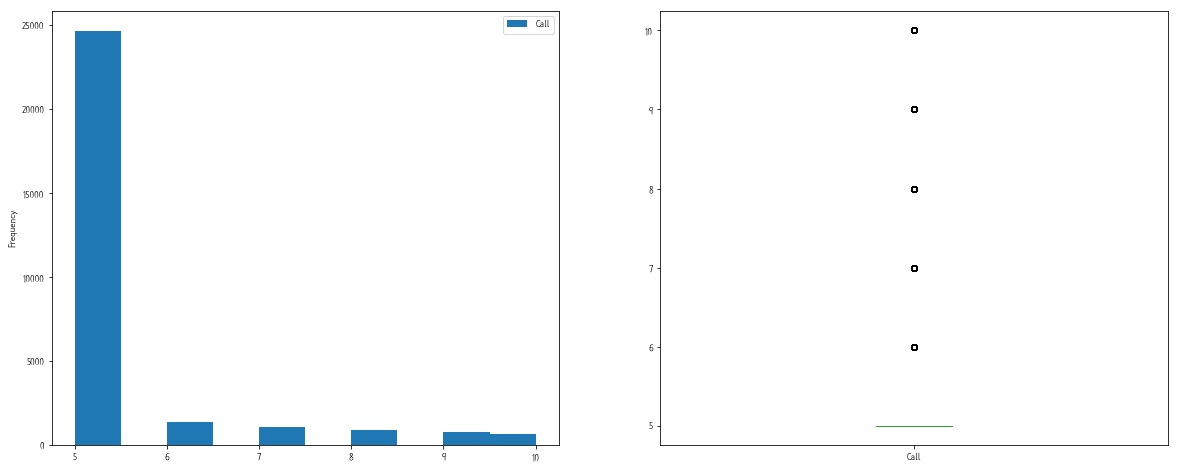

In [24]:
fig = plt.figure(figsize=[20,8])
ax1 = fig.add_subplot(1,2,1)
data.loc[data.Call <= 10].plot(kind='hist', ax = ax1)

ax2 = fig.add_subplot(1,2,2)
data.loc[data.Call <= 10].plot(kind='box', ax = ax2)
plt.show()

In [25]:
# 전체 자료의 50%는 5이기 때문에 살펴본다.(5이하의 값은 존재하지 않는다고 홈페이지에 명시돼있다.)

print(data.loc[data.Call == 5].shape)
data.loc[data.Call == 5].head()

(24651, 9)


,Day_of_week,Gender,Age,Loc_mid,Loc_small,Call,Year,Month,Day
4,토,여,60대이상,강남구,신사동,5,2017,04,01
5,토,남,60대이상,강남구,논현동,5,2017,04,01
6,토,남,30대,강남구,대치동,5,2017,04,01
7,토,여,10대,강남구,역삼동,5,2017,04,01
8,토,여,10대,강남구,도곡동,5,2017,04,01


In [26]:
print(data.loc[(data.Call > 5)&(data.Call < 10)].shape)
data.loc[(data.Call > 5)&(data.Call < 10)].head()

(4240, 9)


,Day_of_week,Gender,Age,Loc_mid,Loc_small,Call,Year,Month,Day
10,토,남,10대,강남구,개포동,6,2017,04,01
14,토,여,50대,강남구,개포동,6,2017,04,01
18,토,여,30대,강남구,수서동,6,2017,04,01
20,토,여,60대이상,강남구,개포동,6,2017,04,01
25,토,남,20대,강남구,일원동,9,2017,04,01


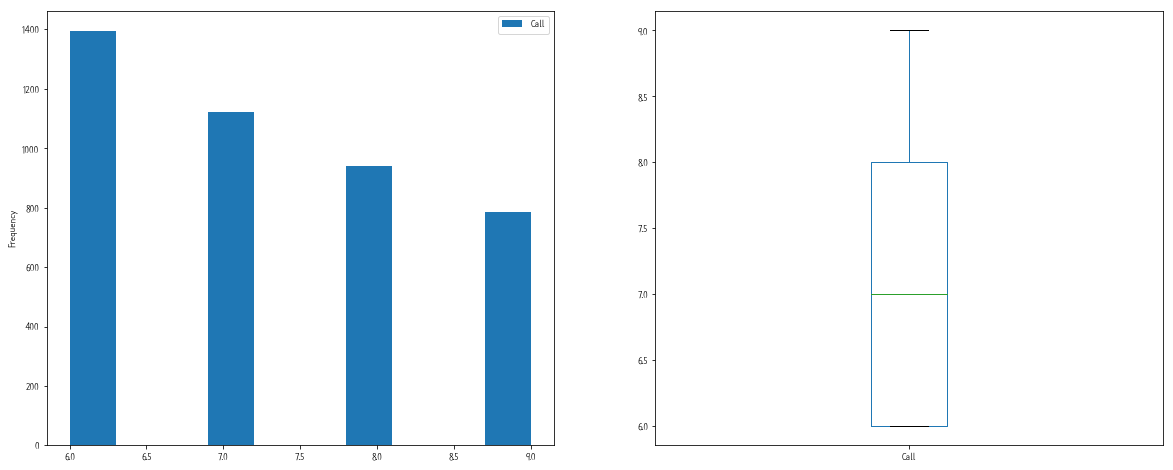

In [27]:
fig = plt.figure(figsize=[20,8])
ax1 = fig.add_subplot(1,2,1)
data.loc[(data.Call > 5)&(data.Call < 10)].plot(kind='hist', ax = ax1)

ax2 = fig.add_subplot(1,2,2)
data.loc[(data.Call > 5)&(data.Call < 10)].plot(kind='box', ax = ax2)
plt.show()

**Call 변수를 살펴본 후 생각**

**데이터에 대한 가설(H0) :  한 행이 == 한 사람**

처음에는 이렇게 생각했는데 Call변수를 보면 Call 수가 396번인 경우 또한 10이상의 경우가 전체의 25%를 차지했다. 따라서 기존 가설인 H0이 틀릴 가능성이 높아졌다. 따라서 기존 가설을 삭제하고 새로운 가설을 아래와 같이 세웠다.

**새로운 데이터에 대한 가설(H1) : Call변수는 지역과 성별,나이에 대한 합계치이다.[aggregation(func = Sum/count) 된 값]**

이를 증명하기 위해 groupby 매소드를 사용해서 확인해 보자

In [28]:
gb_data = data.groupby('Day')

In [43]:
gb_data.get_group('01').loc[gb_data.get_group('01').Loc_small == "대치동"]

,Age,Call,Day_of_week,Gender,Loc_mid,Loc_small,Month,Year
0,40대,17,토,여,강남구,대치동,04,2017
6,30대,5,토,남,강남구,대치동,04,2017
49,40대,5,토,남,강남구,대치동,04,2017
54,30대,5,토,여,강남구,대치동,04,2017
64,20대,5,토,여,강남구,대치동,04,2017
66,50대,5,토,여,강남구,대치동,04,2017
73,10대,6,토,남,강남구,대치동,04,2017
87,10대,5,토,여,강남구,대치동,04,2017
99,20대,5,토,남,강남구,대치동,04,2017
101,50대,5,토,남,강남구,대치동,04,2017


**코드 실행 후 생각: Call변수는 5이하는 모두 5로 처리한다.(홈페이지 참조) 때문에 콜수가 0이어도 5로 처리하는지 아니면 집계하지 않았는지 확인할 필요성을 느꼈다. 전자의 경우 모든 날짜마다 행수가 같을 것이며 후자의 경우 행수가 다를것이다.**

H1 추가 가설: Call 수가 0일 경우 집계되지 않는다.

In [45]:
gb_data.count().head()

,Day_of_week,Gender,Age,Loc_mid,Loc_small,Call,Year,Month
Day,,,,,,,,
01,1416,1416,1416,1416,1416,1416,1416,1416
02,1391,1391,1391,1391,1391,1391,1391,1391
03,1198,1198,1198,1198,1198,1198,1198,1198
04,1222,1222,1222,1222,1222,1222,1222,1222
05,1325,1325,1325,1325,1325,1325,1325,1325


**새로운 데이터에 대한 가설(H1) : Call변수는 지역과 성별,나이에 대한 합계치이다.[aggregation(func = Sum/count) 된 값]**

데이터를 좀 더 자세하게 살펴본 결과 4월1일 대치동에서 40대 여성에 대해 중복값이 없는 것을 알 수 있다. 따라서 H1을 채택할 수 밖에 없다. 또한 상단의 히스토그램과 실제 살펴본 데이터 테이블의 결과로 부터 H1추가가설이 맞음을 알 수 있다. 따라서 데이터는 콜수가 0일 경우 집계되지 않으며 일단 call수가 5인 행의 경우 1번이라도 콜수가 있었음을 가정할 수 있다. 다만 한계점은 단지 발신 버튼이 눌려 기지국에 신호가 전송됐으나 실제로 구매로 이어졌는지 확인 할 길이 없다는 것이다. 따라서 **일단 콜수가 있었다는 것은 구매의사가 있었다는 것으로 가정해야 할 것이다["가정01"].**

** 결과 : H1에 대한 가설을 채택했기 때문에 결국에는 단일 데이터 시트로는 2차적 인사이트를 발견하기 어렵다는 것을 발견. 치킨 데이터들을 매쉬업 하여 사용하여 시간에 따른 정보를 추가함과 동시에 다른 데이터와 결합하여 인사이트를 발견하는 것이 필요하다. 또한 연속형 Call변수에 대하여 양자화를 통해 정보를 재 구성해야 한다는 것을 느꼈다.**